# HEART DISEASE PREDICTION  :

Data contains;

age - age in years

gender - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 1 = normal; 2 = fixed defect; 3 = reversable defect

target - have disease or not (1=yes, 0=no)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
df=pd.read_csv('HEART_DISEASE_PREDICTION.csv')
df.columns=['age','gender','chest_pain_type','resting_blood_pressure',
            'cholestrol','fasting_blood_sugar','rest_ecg','max_heart_rate_achieved',
            'exercise_include_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']
print(df.shape)
df.head(10)

(1025, 14)


,age,gender,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_include_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
# Removing duplicate data
df.drop_duplicates(inplace=True)
n_rows, n_cols = df.shape
print(f"After removing duplicate data we now have {n_rows} domain instances.")

After removing duplicate data we now have 302 domain instances.


In [4]:
df.describe()

,age,gender,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_include_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#unique value count present in each column
for col in df.columns.tolist():
    print (col,":", len(df[col].unique()))

age : 41
gender : 2
chest_pain_type : 4
resting_blood_pressure : 49
cholestrol : 152
fasting_blood_sugar : 2
rest_ecg : 3
max_heart_rate_achieved : 91
exercise_include_angina : 2
st_depression : 40
st_slope : 3
num_major_vessels : 5
thalassemia : 4
target : 2


Percentage of Patients Haven't Heart Disease:45.70% 
Percentage of Patients Have Heart Disease: 54.30%


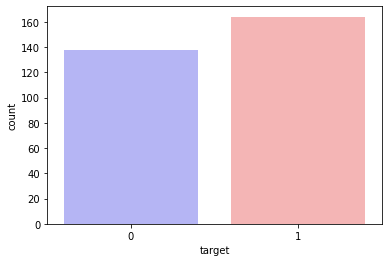

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease:{:.2f}% ".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

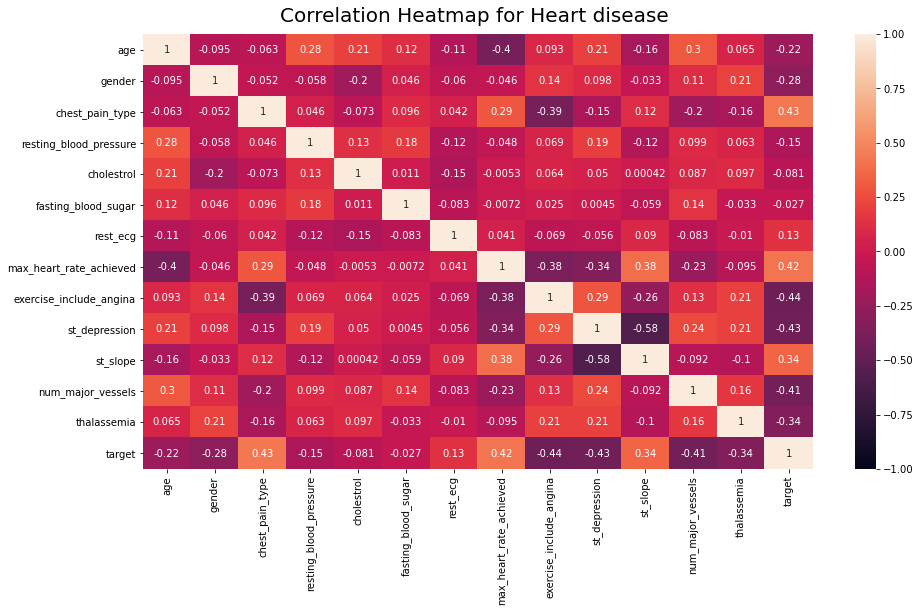

In [7]:
# Increase the size of the heatmap.
plt.figure(figsize=(15, 8))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap for Heart disease ', fontdict={'fontsize':20}, pad=12);


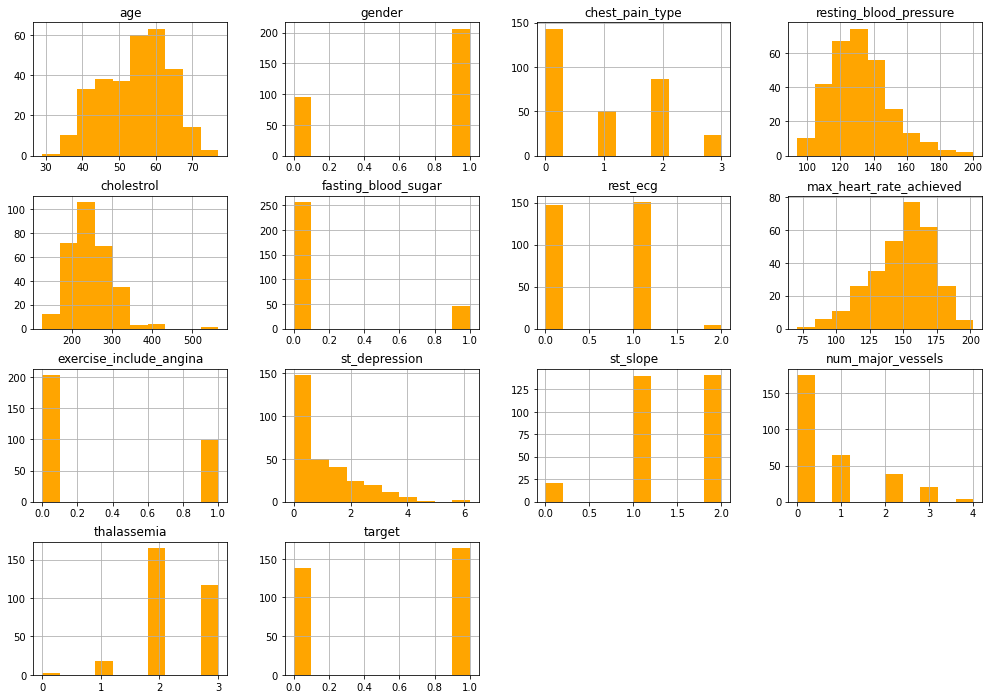

In [8]:
#representing features in histogam form:
df.hist(color='orange',figsize=(17,12))
plt.show()

### Splitting data for  training and testing:

In [9]:
x= df.iloc[:,0:13].values 
y= df['target'].values
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20,random_state=42)
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 


## ALGORITHMS USED ARE AS FOLLOWS:

1]DESICION TREE

2]LOGISTIC REGRESSION

3]K-NEAREST NEIGHBOUR

4]SUPPORT VECTOR MECHANISM

### 1]DESICION TREE ALGORITHM:

In [10]:
from sklearn.tree import DecisionTreeClassifier

CONFUSION MATRIX:


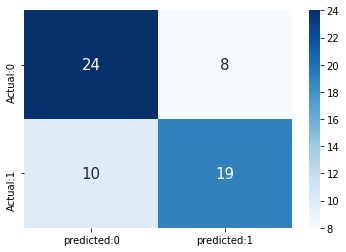

In [11]:
#creating object for the model:
dtc=DecisionTreeClassifier()
#fitting data to the object
dtc.fit(x_train,y_train)
#prediction on test data
y_pred=dtc.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat=pd.DataFrame(data=confusion_mat, columns=['predicted:0','predicted:1'], index=['Actual:0','Actual:1'])
sns.heatmap(confusion_mat, annot=True,cmap='Blues',fmt='d',cbar=True, annot_kws={'size':15})
print("CONFUSION MATRIX:")
plt.show()

In [12]:
#checking classification report
CR=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:")
print(CR)
# accuracy :
Accuracy_dtc=accuracy_score(y_test,y_pred)
print("ACCURACY_SCORE FOR DECISION TREE: ")
print ("{0:.0f}%".format(Accuracy_dtc*100))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        32
           1       0.70      0.66      0.68        29

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61

ACCURACY_SCORE FOR DECISION TREE: 
70%


### 2] Logistic Regression:

In [13]:
from sklearn.linear_model import LogisticRegression

CONFUSION MATRIX:


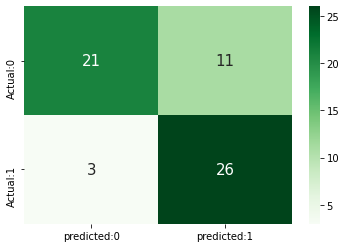

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.70      0.90      0.79        29

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

ACCURACY_SCORE FOR DECISION TREE:
77%


In [14]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat=pd.DataFrame(data=confusion_mat, columns=['predicted:0','predicted:1'], index=['Actual:0','Actual:1'])
sns.heatmap(confusion_mat, annot=True,cmap='Greens',fmt='d',cbar=True, annot_kws={'size':15})
print("CONFUSION MATRIX:")
plt.show()
#checking classification report
CR=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:")
print(CR)
# accuracy :
Accuracy_logreg=accuracy_score(y_test,y_pred)
print("ACCURACY_SCORE FOR DECISION TREE:")
print ("{0:.0f}%".format(Accuracy_logreg*100))

### 3] KNN:

In [15]:
from sklearn.neighbors import KNeighborsClassifier  

Minimum error: 0.16393442622950818 at K = 11
The best accuracy : 83.61 % with k= 11
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

CONFUSION MATRIX:


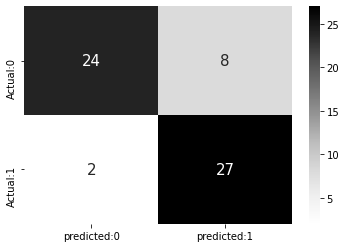

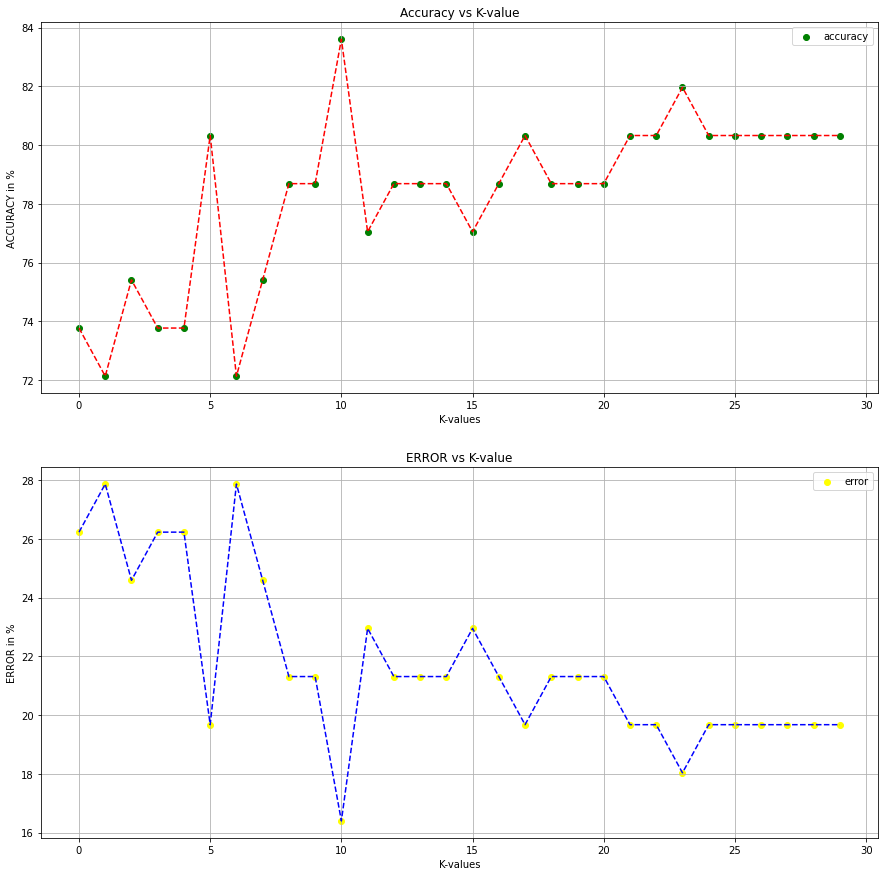

In [16]:
error = []
accuracy=[]
#Calculating error and accuracy for K values between 1 and 30
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    error.append(np.mean(y_pred != y_test))
    accuracy.append(acc)
accuracy=np.array(accuracy)

print("Minimum error:",min(error),"at K =",error.index(min(error))+1)
print( "The best accuracy :", np.round(accuracy.max()*100,2), "% with k=", accuracy.argmax()+1) 
Maximum_knn_acc=np.round(accuracy.max()*100,2)
error=np.array(error)

#confusion matrix
knn = KNeighborsClassifier(n_neighbors=accuracy.argmax()+1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat=pd.DataFrame(data=confusion_mat, columns=['predicted:0','predicted:1'], index=['Actual:0','Actual:1'])

sns.heatmap(confusion_mat, annot=True,cmap='Greys',fmt='d', annot_kws={'size':15})
CR=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:")
print(CR)

print("CONFUSION MATRIX:")
import matplotlib.pyplot as plt
#plotting accuracy vs k values
x1=np.arange(0,30,1)
fg,ax=plt.subplots(2,1,figsize=(15,15))
ax[0].plot(x1,accuracy*100,'--r')
ax[0].scatter(x1,accuracy*100,color='green',label='accuracy')
ax[0].set_xlabel('K-values')
ax[0].set_ylabel('ACCURACY in %')
ax[0].set_title('Accuracy vs K-value')
ax[0].legend()
ax[0].grid()

ax[1].plot(x1,error*100,'--b')
ax[1].scatter(x1,error*100,color='yellow',label='error')
ax[1].set_xlabel('K-values')
ax[1].set_ylabel('ERROR in %')
ax[1].set_title('ERROR vs K-value')
ax[1].legend()
ax[1].grid()
plt.show()


### 4] SUPPORT VECTOR MECHANISM:

In [17]:
from sklearn.svm import SVC

CONFUSION MATRIX:


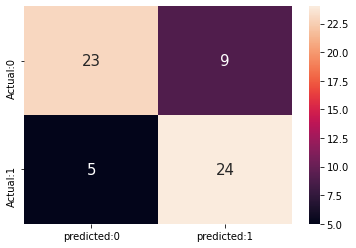

In [24]:
#creating object for the model:
svc=SVC(kernel='linear')
#fitting data to the object
svc.fit(x_train,y_train)
#prediction on test data
y_pred=svc.predict(x_test)
confusion_mat=confusion_matrix(y_test,y_pred)
confusion_mat=pd.DataFrame(data=confusion_mat, columns=['predicted:0','predicted:1'], index=['Actual:0','Actual:1'])
sns.heatmap(confusion_mat, annot=True,fmt='d', annot_kws={'size':15})
print("CONFUSION MATRIX:")
plt.show()

In [25]:
#checking classification report
CR=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:")
print(CR)
# accuracy :
Accuracy_svc=accuracy_score(y_test,y_pred)
print("ACCURACY_SCORE FOR SVM:")
print ("{0:.0f}%".format(Accuracy_svc*100))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

ACCURACY_SCORE FOR SVM:
77%


#### Comparing Accuracies of different ML models for Heart disease prediction:

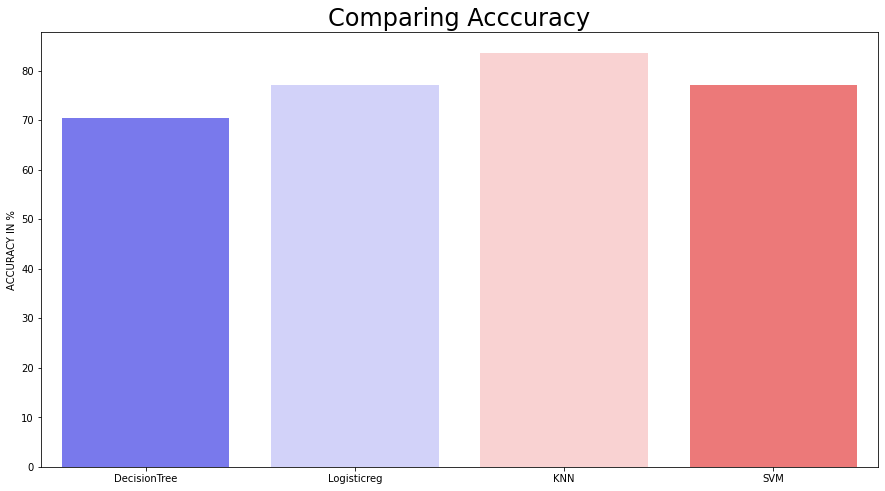

In [20]:
A=['DecisionTree','Logisticreg','KNN','SVM']
B=[Accuracy_dtc*100,Accuracy_logreg*100,Maximum_knn_acc,Accuracy_svc*100]
plt.figure(figsize=(15,8))
sns.barplot(x=A, y=B,palette="bwr")
plt.title('Comparing Acccuracy',fontsize=24)
plt.ylabel('ACCURACY IN %')
plt.show()

In [21]:
B_arr=np.array(B)
print("The best model based on the best accuracy:",A[B_arr.argmax()] ) 
print("With Accuracy_score:",B[B_arr.argmax()],"%")


The best model based on the best accuracy: KNN
With Accuracy_score: 83.61 %
